# Scraped Data Wrangling

The data scraped from [goodreads.com](https://www.goodreads.com/) are saved in two csv files. One is booksinfo.csv and the other is usersinfo.csv. The file - booksinfo.csv - contains the general information of the books such as, a book's name, author, link to its goodreads webpage, average rating, and number of ratings. The file - usersinfo.csv - contains the information of the users, who rated the books saved in the booksinfo.csv file. It contains a book's name, author, the date of its first publication, the ID of each user who rated it, the date of the rating, and the rating given by the user. The user-ratings are usually given in the form of one-to-five stars, where the number of stars correspond to the following sentiments -

1 star - did not like it</br>
2 stars - it was okay</br>
3 stars - liked it</br>
4 stars - really liked it</br>
5 stars - it was amazing

This notebooks performs data wrangling to clean and transform the raw data into interpretable and usable format. The main goal here is - 

1. to find the number of Bengali books, of which the intended information is properly collected 
2. create a final collection merging the information of each book and the users, who rated it. 

In [1]:
# Import the necessary libraries for data wrangling.

import pandas
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
# Define the filepaths of booksinfo.csv and usersinfo.csv.

books_filepath = './goodbooks/booksinfo.csv'
users_filepath = './goodbooks/usersinfo.csv'

The dataframe containing the books information from the booksinfo.csv is referred to as Books DF in this notebook. The users information from usersinfo.csv is referred to as Users DF.

In [3]:
# Read the booksinfo.csv file to get Books DF.

books_df = pandas.read_csv(books_filepath)
books_df

,name,author,booklink,avg_rating,num_ratings
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,/book/show/2426848._,4.59,3054
1,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,/book/show/5968988-byomkesh-bakshi-stories,4.27,1182
2,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,/book/show/12220441,4.52,510
3,সত্যান্বেষী,Sharadindu Bandyopadhyay,/book/show/20746143,4.14,534
4,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,/book/show/17410164,4.47,437
...,...,...,...,...,...
4989,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,/book/show/48570936,4.00,1
4990,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,/book/show/32376274,4.00,1
4991,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,/book/show/32383887,2.00,1
4992,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,/book/show/32377880,0.00,0


In [4]:
# Edit the booklink column values to add the common site-url to each of the books' link. 

goodreads_url = 'https://www.goodreads.com'
books_df['booklink'] = books_df['booklink'].map(lambda x: f'{goodreads_url}{x}')
books_df

,name,author,booklink,avg_rating,num_ratings
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054
1,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/5968988-by...,4.27,1182
2,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12220441,4.52,510
3,সত্যান্বেষী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746143,4.14,534
4,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/17410164,4.47,437
...,...,...,...,...,...
4989,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,https://www.goodreads.com/book/show/48570936,4.00,1
4990,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32376274,4.00,1
4991,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32383887,2.00,1
4992,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32377880,0.00,0


In [5]:
# Read the usersinfo.csv file to get Users DF.

users_df = pandas.read_csv(users_filepath)
users_df

,name,author,first-published,user_id,user_rating_date,user_rating
0,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",really liked it
1,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),94815246,"Jul 17, 2020",really liked it
2,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),3654176,"Mar 14, 2012",really liked it
3,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),23621066,"May 20, 2014",it was amazing
4,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),9100524,"May 04, 2012",it was amazing
...,...,...,...,...,...,...
99442,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,42999317,NaN,NaN
99443,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,110082154,NaN,NaN
99444,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,80047973,NaN,NaN
99445,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,63338378,NaN,NaN


NaN values are ignored primarily for Users DF because one of the goals here is to merge the information in this DF with that in the Books DF and Books DF does not seem to have any NaN values.

In [6]:
# Change the rating sentiments to their representative star values in the Users DF.

rating_val = {'did not like it': 1, 
              'it was okay': 2, 
              'liked it': 3, 
              'really liked it': 4, 
              'it was amazing': 5}

users_df['user_rating'] = users_df['user_rating'].map(rating_val, na_action = 'ignore')
users_df

,name,author,first-published,user_id,user_rating_date,user_rating
0,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",4.0
1,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),94815246,"Jul 17, 2020",4.0
2,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),3654176,"Mar 14, 2012",4.0
3,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),23621066,"May 20, 2014",5.0
4,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),9100524,"May 04, 2012",5.0
...,...,...,...,...,...,...
99442,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,42999317,NaN,NaN
99443,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,110082154,NaN,NaN
99444,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,80047973,NaN,NaN
99445,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,63338378,NaN,NaN


## Remove non-bengali books

Let's take a look at the authors the collected books are written by. Many of the authors are not actually Bengali writers in the raw data. Create a list of the non-Bengali writers and extract the rows from the Books DF that do not have their authors mentioned in the list. Repeat the same processing for the Users DF and check if both the DFs contain the same authors.

In [7]:
# See the unique values in 'author' column to find out the non-Bengali writers.

books_df['author'].unique()

array(['Sharadindu Bandyopadhyay', 'Bibhutibhushan Bandyopadhyay',
       'Tarashankar Bandyopadhyay', 'Laura Ingalls Wilder',
       'Jahanara Imam', 'Muhammed Zafar Iqbal', 'Sukumar Ray',
       'Buddhadeb Guha', 'Sheikh Mujibur Rahman',
       'বঙ্গবন্ধু শেখ মুজিবুর রহমান', 'Manik Bandopadhyay',
       'Samaresh Majumdar', 'Ashapurna Devi', 'Kazi Nazrul Islam',
       'Shirshendu Mukhopadhyay', 'Satyajit Ray', 'Buddhadeva Bose',
       'Dakshinaranjan Mitra Majumder', 'Omar Khayyám', 'Hafez',
       'Hans Christian Andersen', 'Arunava Sinha', 'Kālidāsa',
       'Partha Sarathi Chattopadhyay', 'Premendra Mitra',
       'Kamal Chowdhury', 'Ryszard Frelek', 'তারাশঙ্কর বন্দোপাধ্যায়',
       'Martin Edwards', 'John Pugmire', 'Sunil Gangopadhyay',
       'হেমেন্দ্র কুমার রায়', 'Harinarayan Chattopadhyay',
       'Asitkumar Bandopadhyay', 'Jibanananda Das',
       'Abanindranath Tagore', 'Leela Majumdar', 'Henri Cartier-Bresson',
       'Alberto Manguel', 'MY SUPPORT', 'Ritwik Ghatak',
 

In [8]:
# Create a list of non-bengali writers.

non_bengali_writers = ['Laura Ingalls Wilder', 'Omar Khayyám', 'Hafez',
       'Hans Christian Andersen', 'Ryszard Frelek', 'Martin Edwards', 'John Pugmire', 'Henri Cartier-Bresson',
       'Alberto Manguel', 'MY SUPPORT', 'W. Somerset Maugham', 'Andrew Robinson',
       'Ray Bradbury', 'Nâzım Hikmet', 'Mala Dayal',
       'Gaston Roberge', 'Enrico Magrelli', 'Ashok Jain',
       'Kath Murdoch', 'Charles Baudelaire', 'Luigi Pirandello', 'editionNEXT.com', 'Alex Mason', 'Hermann Hesse','Jane Austen', 'William Shakespeare',
       'Henry David Thoreau', 'Marcel Proust', 'Various', 'Henry James',
       'Robert Louis Stevenson', 'Virginia Woolf', 'Charles Dickens',
       'A.S. Balakrishnan', 'Munshi Premchand', 'Writing Knights Press',
       'Dušan Zbavitel', 'Patricia Lynch', 'Jim Corbett',
       'Barbara H. Solomon', 'Khushwant Singh', 'Verrier Elwin',
       'Edward James Corbet', 'Ginu Kamani',
       'Meena Alexander', 'Anand', 'William Peter Blatty', 'Negar Akhavi', 'Lao Tzu', 'William Blake', 'Ann VanderMeer', 'Kabir', 'Силвия Йотова',
       'John Carey', 'Edgar Allan Poe', 'James Naughtie', 'Marvin Kaye',
       'Rudyard Kipling', 'Ryūnosuke Akutagawa', 'Jaroslav Pelikan',
       'Sue Bradbury', 'W.B. Yeats', 'Chitra Gajadin',
       'Albert Einstein', 'Lord Byron', 'David    Masterman',
       'M.R. Nelson', 'Aurélio Buarque de Holanda Ferreira', 'Anonymous', 'William Winstanley Pearson',
       'Alberto Moravia', 'Στέφανος Ελμάζης', 'Sean  Murphy',
       'Richard Skelton', 'Ernest Rhys', 'Alexander Pushkin',
       'Harcharan Chawla', 'Golgotha Press', 'Krishna-Dwaipayana Vyasa',
       'Leo Hamalian', 'Yiannis Ritsos', 'Qian Zhongshu',
       'John Steinbeck', 'Hawe Setiawan', 'Ghizela Rowe', 'Oscar Wilde',
       'Sólem Aléchem', 'Patrick Colm Hogan', 'Samuel Carr',
       'Kabir Kabir', 'รพินทรนาถ ฐากูร', 'P.T. Barnum', 'KathaBooks',
       'Margaret B. White', 'Ovid', 'Bjørnstjerne Bjørnson',
       'Ashvin Mehta', 'Nicol Macnicol', 'Sven Lindner',
       'Louisa May Alcott', 'George Calderon', 'Dhumketu',
       'Phoebe Taylor', 'William Rothenstein', 'Kanika Tomar',
       'Sherwood Anderson', 'Upton Sinclair', 'Rabbit & Turtle', 'Merwin Roe',
       'Desmond Kon Zhicheng-Mingdé', 'Guy de Maupassant',
       'U.R. Ananthamurthy', 'Isaac Bashevis Singer',
       'Sarvepalli Radhakrishnan', 'Confucius', 'Prem Chand Lal',
       'Sangeetha Rayapati', 'D.J. Irani', 'Rumi', 'Chaitanya Modak', 'Patrick Geddes',
       'Divaldo Pereira Franco', 'Rose Reinhardt Anthon',
       'Anatole France', 'John Donne', 'Theodore Douglas Dunn',
       'Christian Bernard', 'Emma Laybourn', 'Рабиндранат Тагор', 'Leela Gulati']

In [9]:
# Let's now use the non-Bengali writers list to extract the books by Bengali authors

bengali_writers_books_df = books_df.loc[~books_df['author'].isin(non_bengali_writers)]
bengali_writers_books_df

,name,author,booklink,avg_rating,num_ratings
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054
1,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/5968988-by...,4.27,1182
2,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12220441,4.52,510
3,সত্যান্বেষী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746143,4.14,534
4,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/17410164,4.47,437
...,...,...,...,...,...
4989,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,https://www.goodreads.com/book/show/48570936,4.00,1
4990,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32376274,4.00,1
4991,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32383887,2.00,1
4992,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32377880,0.00,0


In [10]:
# Now we do see only Bengali writers

bengali_writers_books_df['author'].unique()

array(['Sharadindu Bandyopadhyay', 'Bibhutibhushan Bandyopadhyay',
       'Tarashankar Bandyopadhyay', 'Jahanara Imam',
       'Muhammed Zafar Iqbal', 'Sukumar Ray', 'Buddhadeb Guha',
       'Sheikh Mujibur Rahman', 'বঙ্গবন্ধু শেখ মুজিবুর রহমান',
       'Manik Bandopadhyay', 'Samaresh Majumdar', 'Ashapurna Devi',
       'Kazi Nazrul Islam', 'Shirshendu Mukhopadhyay', 'Satyajit Ray',
       'Buddhadeva Bose', 'Dakshinaranjan Mitra Majumder',
       'Arunava Sinha', 'Kālidāsa', 'Partha Sarathi Chattopadhyay',
       'Premendra Mitra', 'Kamal Chowdhury', 'তারাশঙ্কর বন্দোপাধ্যায়',
       'Sunil Gangopadhyay', 'হেমেন্দ্র কুমার রায়',
       'Harinarayan Chattopadhyay', 'Asitkumar Bandopadhyay',
       'Jibanananda Das', 'Abanindranath Tagore', 'Leela Majumdar',
       'Ritwik Ghatak', 'Punyolata Chakraborty', 'Samar Sen', 'Ajeya Roy',
       'Upendrakishore Ray Chowdhury', 'Sandip Ray',
       'Abhijit Chattopadhyay', 'Parimal Mukhopadhyay', 'Bimal Ghosh',
       'Sisirkumar Mazumdar', 'Pa

In [11]:
# Let's repeat the same processing for the Users DF.

bengali_writers_users_df = users_df.loc[~users_df['author'].isin(non_bengali_writers)]
bengali_writers_users_df

,name,author,first-published,user_id,user_rating_date,user_rating
0,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",4.0
1,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),94815246,"Jul 17, 2020",4.0
2,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),3654176,"Mar 14, 2012",4.0
3,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),23621066,"May 20, 2014",5.0
4,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),9100524,"May 04, 2012",5.0
...,...,...,...,...,...,...
99442,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,42999317,NaN,NaN
99443,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,110082154,NaN,NaN
99444,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,80047973,NaN,NaN
99445,জোড় বিজোড়,Shirshendu Mukhopadhyay,|,63338378,NaN,NaN


In [12]:
bengali_writers_users_df['author'].unique()

array(['Bibhutibhushan Bandyopadhyay', 'বঙ্গবন্ধু শেখ মুজিবুর রহমান',
       'Tarashankar Bandyopadhyay', 'Satyajit Ray',
       'Shirshendu Mukhopadhyay', 'Dakshinaranjan Mitra Majumder',
       'Buddhadeb Guha', 'Manik Bandopadhyay', 'Samaresh Majumdar',
       'Kazi Nazrul Islam', 'Sharadindu Bandyopadhyay',
       'তারাশঙ্কর বন্দোপাধ্যায়', 'Asitkumar Bandopadhyay',
       'Upendrakishore Ray Chowdhury', 'Abhijit Chattopadhyay',
       'Ajeya Roy', 'Sandip Ray', 'Samar Sen', 'Punyolata Chakraborty',
       'Leela Majumdar', 'Abanindranath Tagore', 'Jibanananda Das',
       'Ritwik Ghatak', 'Sukumar Ray', 'Rajshekhar Basu',
       'Premendra Mitra', 'Manjil Sen', 'বিনোদবিহারী মুখোপাধ্যায়',
       'Parsuram', 'Sisirkumar Mazumdar', 'Bimal Ghosh',
       'Parimal Mukhopadhyay', 'Arunava Sinha',
       'Harinarayan Chattopadhyay', 'হেমেন্দ্র কুমার রায়',
       'Sunil Gangopadhyay', 'Kamal Chowdhury',
       'Partha Sarathi Chattopadhyay', 'Buddhadeva Bose',
       'Sudhindranath Dutt

In [13]:
# Verify both users and books dfs have same (equal number of) writers

bengali_writers_users_df['author'].unique().shape, bengali_writers_books_df['author'].unique().shape

((85,), (85,))

In [14]:
# The difference is 0. Therefore, both dfs have same authors

list(set(bengali_writers_users_df['author']) ^ set(bengali_writers_books_df['author']))

[]

## Fix different spellings of same author's name

It is observed in the list of authors that some authors' name is recorded in different spellings. These multiple spellings are transformed into a single spelling in the DFs. This may produce some duplicate rows containing same (book, author).

In [15]:
# These authors are repeated in different spellings in the DFs.
# Put the different spellings of an author in a list and thus make a list of such lists.

multiple_records_authors = [['তারাশঙ্কর বন্দোপাধ্যায়', 'Tarashankar Bandyopadhyay', 'Tarashankar Bandyopadhy'], 
                            ['Sheikh Mujibur Rahman', 'বঙ্গবন্ধু শেখ মুজিবুর রহমান'], 
                            ['Upendrakishore Ray Chowdhury', 'Upendrakisor Ray'], 
                            ['Rajshekhar Basu', 'Parsuram'], 
                            ['Shirshendu Mukhopadhyay', 'Sirshendu Mukhopadhyay']]

In [16]:
# Change the multiple spellings of one author into a single spelling in the DFs. 

for author in multiple_records_authors:
    for dframe in [bengali_writers_books_df, bengali_writers_users_df]:
        dframe.loc[dframe["author"].isin(author), "author"] = author[0]

## Remove the duplicate books in the DFs

Since the transformation of different spellings to a single spelling may cause the duplication of (name, author) pairs and also, there may be duplicate entries in the DFs, it is needed to check for such duplicate entries and remove them. 

Check if there are duplicate entries in the Books DF first.

In [17]:
# Check if there are duplicate entries in the Books DF and keep all the duplicates.

duplicates = bengali_writers_books_df.loc[bengali_writers_books_df.duplicated(keep=False)]
duplicates

,name,author,booklink,avg_rating,num_ratings
31,চাঁদের পাহাড়,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/7936528,4.55,4684
113,সমগ্র শিশুসাহিত্য,Sukumar Ray,https://www.goodreads.com/book/show/16145672,4.74,868
127,The Select Nonsense of Sukumar Ray,Sukumar Ray,https://www.goodreads.com/book/show/250135.The...,4.56,75
138,সুকুমার সাহিত্যসমগ্র: প্রথম খণ্ড,Sukumar Ray,https://www.goodreads.com/book/show/33633721,4.90,49
148,সুকুমার সাহিত্যসমগ্র: দ্বিতীয় খণ্ড,Sukumar Ray,https://www.goodreads.com/book/show/33633731,4.78,32
...,...,...,...,...,...
4805,বাংলাসাহিত্যের সেরা গল্প,Ahmad Mostofa Kamal,https://www.goodreads.com/book/show/25451475,4.25,12
4809,ভয়াল-ভয়ংকর অমনিবাস,Partha Sarathi Chattopadhyay,https://www.goodreads.com/book/show/32071285--,4.10,10
4968,নবকল্লোলের পঞ্চকন্যা,Mahasweta Devi,https://www.goodreads.com/book/show/34503948,5.00,2
4970,Women Writing in Bengal: An Anthology of Short...,Saumitra Chakravarty,https://www.goodreads.com/book/show/6253358-wo...,4.00,2


Indeed some entries are duplicated in the dataframe. All column values are identical for these entries. We can simply drop all the duplicates keeping on the first one in the DF.

In [18]:
# E.g., pick such an entry and see all the identical values.

bengali_writers_books_df.loc[bengali_writers_books_df['name'] == 'The Select Nonsense of Sukumar Ray']

,name,author,booklink,avg_rating,num_ratings
127,The Select Nonsense of Sukumar Ray,Sukumar Ray,https://www.goodreads.com/book/show/250135.The...,4.56,75
1640,The Select Nonsense of Sukumar Ray,Sukumar Ray,https://www.goodreads.com/book/show/250135.The...,4.56,75


Now check if there are duplicate entries of (author, book) pair. That would mean same book from same author has been entered multiple times in the DF, even if the values of other columns of these entries are different. If possible, we would like keep only a single entry of a book written by an author. Pairing up of (name, author) is necessary to find the unique books because different authors may have different books with the same name. 

In [19]:
# Check if there are duplicate entries of (author, book) pair.

duplicates_book_author = bengali_writers_books_df.loc[bengali_writers_books_df.duplicated(['name', 'author'], 
                                                                                          keep = False)] 
duplicates_book_author

,name,author,booklink,avg_rating,num_ratings
31,চাঁদের পাহাড়,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/7936528,4.55,4684
35,আম আঁটির ভেঁপু,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/20959166,4.54,534
48,বিভূতিভূষণ বন্দ্যোপাধ্যায়ের শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/18278365,4.53,104
66,শ্রেষ্ঠ গল্প,তারাশঙ্কর বন্দোপাধ্যায়,https://www.goodreads.com/book/show/16130335,3.85,106
111,পাগলা দাশু,Sukumar Ray,https://www.goodreads.com/book/show/17706566,4.62,1051
...,...,...,...,...,...
4968,নবকল্লোলের পঞ্চকন্যা,Mahasweta Devi,https://www.goodreads.com/book/show/34503948,5.00,2
4970,Women Writing in Bengal: An Anthology of Short...,Saumitra Chakravarty,https://www.goodreads.com/book/show/6253358-wo...,4.00,2
4972,বাছাই গল্প,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/59478223,0.00,0
4978,বাছাই গল্প,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/59478210,0.00,0


Dropping the duplicate rows from these duplicated (name, author) pairs it is seen that same book has multiple entries with different booklink, avg_rating, and num_ratings. We can check this simply by inspecting duplicated books of an author.

In [20]:
# Dropping the duplicate rows for primary inspection.

duplicates_book_author.drop_duplicates()

,name,author,booklink,avg_rating,num_ratings
31,চাঁদের পাহাড়,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/7936528,4.55,4684
35,আম আঁটির ভেঁপু,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/20959166,4.54,534
48,বিভূতিভূষণ বন্দ্যোপাধ্যায়ের শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/18278365,4.53,104
66,শ্রেষ্ঠ গল্প,তারাশঙ্কর বন্দোপাধ্যায়,https://www.goodreads.com/book/show/16130335,3.85,106
111,পাগলা দাশু,Sukumar Ray,https://www.goodreads.com/book/show/17706566,4.62,1051
...,...,...,...,...,...
4958,ভালো-বাসার বারান্দা,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/59767876--,5.00,1
4966,হৃদকমল,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/44234663,0.00,0
4967,মেঘদূত,Kālidāsa,https://www.goodreads.com/book/show/24686086,4.22,411
4972,বাছাই গল্প,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/59478223,0.00,0


In [21]:
# The duplicate entries of author 'Bibhutibhushan Bandyopadhyay' have different booklink, avg_rating, num_ratings.

duplicates_book_author.loc[duplicates_book_author['author'] == 'Bibhutibhushan Bandyopadhyay']

,name,author,booklink,avg_rating,num_ratings
31,চাঁদের পাহাড়,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/7936528,4.55,4684
35,আম আঁটির ভেঁপু,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/20959166,4.54,534
48,বিভূতিভূষণ বন্দ্যোপাধ্যায়ের শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/18278365,4.53,104
1600,চাঁদের পাহাড়,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/7936528,4.55,4684
1632,আম আঁটির ভেঁপু,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/28445605,4.54,534
2006,শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/32607784,4.44,9
2026,শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/53284524,4.50,2
2040,শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/55249168,5.00,2
2056,বিভূতিভূষণ বন্দ্যোপাধ্যায়ের শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/55249249,0.00,0


Since the number of ratings is different for the duplicate entries of the same book, if possible, we would like to keep the entry with the highest number of ratings. To do this, first sort these duplicated entries according to the descending order of their num_ratings values and then keep only the first entry and remove all the other duplicates containing lower num_ratings.

In [22]:
# Sort each (name, author, num_ratings) in the descending order. 

duplicates_book_author.sort_values(['name', 'author', 'num_ratings'], 
                                   ascending = False)

,name,author,booklink,avg_rating,num_ratings
3387,হে মহাজীবন,Sunil Gangopadhyay,https://www.goodreads.com/book/show/31134777,3.71,14
3570,হে মহাজীবন,Sunil Gangopadhyay,https://www.goodreads.com/book/show/43798118,3.50,2
4945,হৃদকমল,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/34511167,2.67,6
4966,হৃদকমল,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/44234663,0.00,0
1106,সেরা গোয়েন্দা গল্প,Sunil Gangopadhyay,https://www.goodreads.com/book/show/33654797,3.18,11
...,...,...,...,...,...
4598,Letters,Rabindranath Tagore,https://www.goodreads.com/book/show/38652775-l...,0.00,0
3741,Binodini,Rabindranath Tagore,https://www.goodreads.com/book/show/1007179.Bi...,3.76,248
4642,Binodini,Rabindranath Tagore,https://www.goodreads.com/book/show/59302447-b...,0.00,0
139,Abol Tabol,Sukumar Ray,https://www.goodreads.com/book/show/35651419-a...,4.76,50


In [23]:
# Keep the entries with the highest number of num_ratings and remove their other duplicates.

duplicates_book_author.sort_values(['name', 'author', 'num_ratings'], 
                                   ascending = False).drop_duplicates(['name', 'author']).sort_index()

,name,author,booklink,avg_rating,num_ratings
31,চাঁদের পাহাড়,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/7936528,4.55,4684
35,আম আঁটির ভেঁপু,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/20959166,4.54,534
48,বিভূতিভূষণ বন্দ্যোপাধ্যায়ের শ্রেষ্ঠ গল্প,Bibhutibhushan Bandyopadhyay,https://www.goodreads.com/book/show/18278365,4.53,104
66,শ্রেষ্ঠ গল্প,তারাশঙ্কর বন্দোপাধ্যায়,https://www.goodreads.com/book/show/16130335,3.85,106
111,পাগলা দাশু,Sukumar Ray,https://www.goodreads.com/book/show/17706566,4.62,1051
...,...,...,...,...,...
4392,Sonar Tari,Rabindranath Tagore,https://www.goodreads.com/book/show/35224021-s...,4.00,1
4475,ভারতবর্ষ,Rabindranath Tagore,https://www.goodreads.com/book/show/53311227,3.00,1
4520,Letters,Rabindranath Tagore,https://www.goodreads.com/book/show/58208096-l...,0.00,0
4945,হৃদকমল,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/34511167,2.67,6


Since we have figured out the steps to remove the duplicates of a book, we now apply these steps on both Books and Users DF. It is to be noted that we do not perform the last processing of keeping the entry with highest num_ratings for Users DF because this DF does not have num_ratings feature (column). 

Now there are 4655 entries in the Books DF and 4561 entries in the Users DF. This means there are 94 entries less in the Users DF than that in the Books DF.

In [24]:
# Remove duplicate rows

bengali_writers_books_df = bengali_writers_books_df.drop_duplicates().sort_values(['name', 
                                                                                   'author', 
                                                                                   'num_ratings'], 
                                                                                  ascending = False).drop_duplicates(['name', 
                                                                                                                      'author']).sort_index()
# Number of items in Books DFs.

bengali_writers_books_df.shape

(4655, 5)

In [25]:
# See the result of the same processing on Users DF. 
# There are 4561 rows, whereas the Books DF has 4655 rows. 

same_process_users = bengali_writers_users_df.drop_duplicates().sort_values(['name', 
                                                                             'author'], 
                                                                            ascending = False).drop_duplicates(['name', 
                                                                                                                'author']).sort_index()
same_process_users

,name,author,first-published,user_id,user_rating_date,user_rating
0,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",4.0
30,বঙ্গবন্ধুর প্রধান ভাষণ,Sheikh Mujibur Rahman,|,44416136,NaN,NaN
37,இறுதி வார்த்தை / Irudhi Vaarthai,তারাশঙ্কর বন্দোপাধ্যায়,|,25807871,NaN,5.0
83,একেই বলে শুটিং,Satyajit Ray,(first published 1979),16297867,"Apr 11, 2017",5.0
101,"কালো বেড়াল, সাদা বেড়াল",Shirshendu Mukhopadhyay,(ISBN13:,91501377,"Jun 28, 2021",4.0
...,...,...,...,...,...,...
99352,উপন্যাস সমগ্র ৩,Sunil Gangopadhyay,(ISBN13:,138699399,NaN,5.0
99377,"Dewana, Khoimala and the Holy Banyan Tree",Mahasweta Devi,(ISBN13:,1061213,"Apr 08, 2016",NaN
99384,পারিবারিক,Mahasweta Devi,|,16453181,NaN,4.0
99406,ছৌ,Buddhadeb Guha,|,29732048,NaN,4.0


## Find books not common between the two DFs

The difference in the number of books between the two DFs now is 94. Are all these 94 books present in the Books DF and missing only in the Users DF? Or, are there books in the Users DF that are missing in the Books DF? Are all the books in the Users DF present in the Books DF? What are those those entries that are uncommon between the two DFs? Let's try to find out.

In [26]:
# See if both Users and Books DFs have same (equal number of) books.
# The difference in number of unique books is 94.

bengali_writers_books_df.set_index(['name', 'author']).index.unique().shape, same_process_users.set_index(['name', 'author']).index.unique().shape 

((4655,), (4561,))

In [27]:
# Therefore, both DFs do not have same books.
# Take a quick look at the uncommon entries.

uncommon_entries = list(set(bengali_writers_books_df.set_index(['name', 
                                                                'author']).index.unique()) ^ set(same_process_users.set_index(['name', 
                                                                                                                               'author']).index.unique()))
uncommon_entries

[('হিমুর নীল জোছনা (হিমু, #18)', 'Humayun Ahmed'),
 ('रबिन्द्रनाथ टैगोर गीतांजलि: हिन्दी अनुवाद, मूल बांग्ला एवं देवनागरी लिप्यान्तर सहित',
  'Rabindranath Tagore'),
 ('আঙুল কাটা জগলু (হিমু, #13)', 'Humayun Ahmed'),
 ('Sishu Bholanath ( Bengali Edition )', 'Rabindranath Tagore'),
 ('Rabindranath Tagore - 5 Best Short Stories Vol 1', 'Rabindranath Tagore'),
 ('বঙ্কিম রচনাবলী: প্রবন্ধ (বঙ্কিম রচনাবলী, ২য় খন্ড)',
  'Bankim Chandra Chattopadhyay'),
 ("The Child's Return: (Rabindrantath Tagore Masterpiece Collection)",
  'Rabindranath Tagore'),
 ('মিসির আলি! আপনি কোথায়?', 'Humayun Ahmed'),
 ('কাকাবাবু ও বজ্র লামা (কাকাবাবু, #12)', 'Sunil Gangopadhyay'),
 ('The Homecoming:', 'Rabindranath Tagore'),
 ('Mr.Shashmol er Shesh Raatri (মিস্টার শাসমল এর শেষ রাত্রি)', 'Satyajit Ray'),
 ('Raja Praja', 'Rabindranath Tagore'),
 ('আমিই মিসির আলি (মিসির আলি, #12)', 'Humayun Ahmed'),
 ('Bohurupi ( Bengali Edition )', 'Sukumar Ray'),
 ('খুনখারাপি', 'Samaresh Majumdar'),
 ('আমিই মিসির আলি', 'Humayun Ahmed

Number of uncommon entries is 748! But the difference of unique books in the two DFs was 94 only. Does it mean scraping went wrong somewhere and different sets of books were recorded in the two DFs? Find out.

In [28]:
# Number of uncommon entries is 748!
len(uncommon_entries)

748

First find out which entries are not common between the two DFs. A full outer join with indicator being true can show which books are present in the Books DF only, which are present in the Users DF only, and which are present in the both DFs.

In [29]:
# Do full outer join of the two dfs with indicator being true.

union_dfs = bengali_writers_books_df[['name', 
                                      'author']].merge(same_process_users[['name', 
                                                                           'author']], 
                                                       how='outer', 
                                                       indicator=True)
union_dfs

,name,author,_merge
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,both
1,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,both
2,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,both
3,সত্যান্বেষী,Sharadindu Bandyopadhyay,both
4,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,both
...,...,...,...
4977,"Bait, and Other Stories (SB-What Was Communism?)",Mahasweta Devi,right_only
4978,যুদ্ধ পরিস্থিতি (War Situation),Nabarun Bhattacharya,right_only
4979,অটো ও ভোগী (Auto O Bhogi),Nabarun Bhattacharya,right_only
4980,ভালো-বাসার বারান্দা (পর্ব - ২),Nabaneeta Dev Sen,right_only


Now see the entries having either 'left_only' or 'right_only' in the '_merge' column. It shows that 748 unique entries are not common between the two DFs.

In [30]:
# Exclude the entries with 'both' indicator to see the 748 unique entries not common between the two DFs.

left_right_only_df = union_dfs[union_dfs['_merge'] != 'both']
left_right_only_df

,name,author,_merge
94,বীরশ্রেষ্ঠ,Jahanara Imam,left_only
95,প্রবাসের দিনলিপি,Jahanara Imam,left_only
97,দুই মেরু,Jahanara Imam,left_only
99,গজকচ্ছপ,Jahanara Imam,left_only
105,জাহানারা ইমাম সমগ্র,Jahanara Imam,left_only
...,...,...,...
4977,"Bait, and Other Stories (SB-What Was Communism?)",Mahasweta Devi,right_only
4978,যুদ্ধ পরিস্থিতি (War Situation),Nabarun Bhattacharya,right_only
4979,অটো ও ভোগী (Auto O Bhogi),Nabarun Bhattacharya,right_only
4980,ভালো-বাসার বারান্দা (পর্ব - ২),Nabaneeta Dev Sen,right_only


In [31]:
# Another method to find the unique entries.

pandas.concat([bengali_writers_books_df[['name', 
                                         'author']], same_process_users[['name', 
                                                                         'author']]]).drop_duplicates(keep=False)

,name,author
96,বীরশ্রেষ্ঠ,Jahanara Imam
97,প্রবাসের দিনলিপি,Jahanara Imam
99,দুই মেরু,Jahanara Imam
101,গজকচ্ছপ,Jahanara Imam
107,জাহানারা ইমাম সমগ্র,Jahanara Imam
...,...,...
94314,"Bait, and Other Stories (SB-What Was Communism?)",Mahasweta Devi
95102,যুদ্ধ পরিস্থিতি (War Situation),Nabarun Bhattacharya
95315,অটো ও ভোগী (Auto O Bhogi),Nabarun Bhattacharya
95897,ভালো-বাসার বারান্দা (পর্ব - ২),Nabaneeta Dev Sen


In [32]:
# Entries in the Books (left_only) Df.
# 421 entries are not present in the Users DF.

left_only_df = union_dfs[union_dfs['_merge'] == 'left_only']
left_only_df

,name,author,_merge
94,বীরশ্রেষ্ঠ,Jahanara Imam,left_only
95,প্রবাসের দিনলিপি,Jahanara Imam,left_only
97,দুই মেরু,Jahanara Imam,left_only
99,গজকচ্ছপ,Jahanara Imam,left_only
105,জাহানারা ইমাম সমগ্র,Jahanara Imam,left_only
...,...,...,...
4563,Antim Kavita,Rabindranath Tagore,left_only
4564,Card Country,Rabindranath Tagore,left_only
4565,Manusher Dhormo,Rabindranath Tagore,left_only
4579,"Songs of Tagore : Philosophy , Selected Transl...",Mohammed Anisur Rahman,left_only


In [33]:
# Entries in the Users (right_only) DF.
# 327 entries are not present in the Books DF.

right_only_df = union_dfs[union_dfs['_merge'] == 'right_only']
right_only_df

,name,author,_merge
4655,গোলমেলে লোক,Shirshendu Mukhopadhyay,right_only
4656,গ্যাংটকে গন্ডগোল (কমিক),Satyajit Ray,right_only
4657,Where There Is a Will (Arthamanartham),Sharadindu Bandyopadhyay,right_only
4658,Manik Bandopadhyay Galpo Samagra (প্রথম ও দ্বি...,Manik Bandopadhyay,right_only
4659,Jyotsna Rate Betlate (জ্যোৎস্না রাতে বেতলাতে),Buddhadeb Guha,right_only
...,...,...,...
4977,"Bait, and Other Stories (SB-What Was Communism?)",Mahasweta Devi,right_only
4978,যুদ্ধ পরিস্থিতি (War Situation),Nabarun Bhattacharya,right_only
4979,অটো ও ভোগী (Auto O Bhogi),Nabarun Bhattacharya,right_only
4980,ভালো-বাসার বারান্দা (পর্ব - ২),Nabaneeta Dev Sen,right_only


Now inspect the books of a single author to find out the problem. This shows some books are in fact present in both DFs but they have different reprersentations for their name. That means the number of unique books not common between the two DFs is less than 94. To solve this issue we need to process the data in the DFs so that same book is represented by a single name or entered as a single row.

In [34]:
# E.g., Users DF has প্রবাসের দিনলিপি (Probasher Dinlipi), whereas Books DF has প্রবাসের দিনলিপি.

same_process_users.loc[same_process_users['author'] == 'Jahanara Imam']

,name,author,first-published,user_id,user_rating_date,user_rating
38511,জীবন বহে নিরবধি,Jahanara Imam,|,78947644,NaN,3.0
38553,নাটকের অবসানে (Natoker Oboshane),Jahanara Imam,|,17679954,NaN,4.0
38605,জাহানারা ইমাম সমগ্র (Jahanara Imam Samagro),Jahanara Imam,|,61150918,NaN,3.0
38639,মূলধারায় চলেছি গণআদালতের দিনলিপি,Jahanara Imam,|,27338736,NaN,5.0
38706,জীবন মৃত্যু,Jahanara Imam,|,22538158,"Jun 16, 2017",NaN
38728,সাতটি তারার ঝিকিমিকি,Jahanara Imam,(first published April 1966),25360324,"Feb 13, 2015",4.0
38765,নিঃসঙ্গ পাইন,Jahanara Imam,|,82863124,"Jun 01, 2021",3.0
38779,গজকচ্ছপ (Gojkocchop),Jahanara Imam,(first published September 1967),25360324,"Feb 08, 2015",3.0
38790,বিদায় দে মা ঘুরে আসি,Jahanara Imam,|,40006528,"Dec 29, 2015",3.0
38803,বুকের ভিতর আগুন,Jahanara Imam,(first published February 1990),78766250,NaN,5.0


Let's first find out which books have different representations for their names in the two DFs. Cross join the two DFs in order to perform a comparison on each row of the joined DF and find the partial match between the books' name present in the two DFs. Books DF's name and author are named name_x and author_x. User DF's name and author are named name_y and author_y.

In [35]:
# Cross join the two DFs.

cross_joined_df = pandas.merge(bengali_writers_books_df, same_process_users, how = 'cross')

In [36]:
cross_joined_df

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,Pather Panchali: Song of the Road,Bibhutibhushan Bandyopadhyay,(first published September 11th 1929),87324,"Sep 28, 2007",4.0
1,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,বঙ্গবন্ধুর প্রধান ভাষণ,Sheikh Mujibur Rahman,|,44416136,NaN,NaN
2,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,இறுதி வார்த்தை / Irudhi Vaarthai,তারাশঙ্কর বন্দোপাধ্যায়,|,25807871,NaN,5.0
3,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,একেই বলে শুটিং,Satyajit Ray,(first published 1979),16297867,"Apr 11, 2017",5.0
4,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,"কালো বেড়াল, সাদা বেড়াল",Shirshendu Mukhopadhyay,(ISBN13:,91501377,"Jun 28, 2021",4.0
...,...,...,...,...,...,...,...,...,...,...,...
21231450,সতীনাথ রচনাবলী তৃতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32381926,0.00,0,উপন্যাস সমগ্র ৩,Sunil Gangopadhyay,(ISBN13:,138699399,NaN,5.0
21231451,সতীনাথ রচনাবলী তৃতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32381926,0.00,0,"Dewana, Khoimala and the Holy Banyan Tree",Mahasweta Devi,(ISBN13:,1061213,"Apr 08, 2016",NaN
21231452,সতীনাথ রচনাবলী তৃতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32381926,0.00,0,পারিবারিক,Mahasweta Devi,|,16453181,NaN,4.0
21231453,সতীনাথ রচনাবলী তৃতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32381926,0.00,0,ছৌ,Buddhadeb Guha,|,29732048,NaN,4.0


Two types of matches need to be extracted - (Same name and Same author) or (Partial name and Same author). It was observed that the same book has a different representation of its name in the Users DF, where the name is first written in Bengali alphabet and then in English alphabet inside the parentheses. Therefore, the pattern of partial match should equate the part of the name that comes before opening parenthesis. The indices of such matches are found from the cross-joined DF and the entries corresponding to these indices are extracted to generate Common DF.

In [37]:
# Find the indices of before-parenthesis-name matches from the cross-joined DF.

match_idx = cross_joined_df.apply(lambda x: ((x['name_x'] == x['name_y']) or (x['name_y'].split('(')[0].strip() == x['name_x'].split('(')[0].strip())) and (x['author_x'] == x['author_y']), axis = 1)

In [38]:
# Extract the entries corresponding to match_idx from the joined DF.

common_books_df = cross_joined_df[match_idx]

In [39]:
# This is how the Common DF looks.

common_books_df

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
1967,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,4547588,"Sep 07, 2011",5.0
6527,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/5968988-by...,4.27,1182,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,(ISBN13:,4298297,"Oct 19, 2011",3.0
11085,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12220441,4.52,510,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,12102940,"Jun 18, 2017",3.0
15645,সত্যান্বেষী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746143,4.14,534,সত্যান্বেষী,Sharadindu Bandyopadhyay,|,73221135,"Apr 27, 2019",4.0
20204,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/17410164,4.47,437,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,(ISBN13:,73221135,"Jul 18, 2019",5.0
...,...,...,...,...,...,...,...,...,...,...,...
21213187,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,https://www.goodreads.com/book/show/48570936,4.00,1,সতীনাথ ভাদুড়ীর শ্রেষ্ঠ গল্প,Satinath Bhaduri,|,48271129,"Nov 01, 2019",4.0
21217749,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32376274,4.00,1,সতীনাথ রচনাবলী প্রথম খণ্ড,Satinath Bhaduri,|,112216178,NaN,4.0
21222305,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32383887,2.00,1,সতীনাথ রচনাবলী চতুর্থ খণ্ড,Satinath Bhaduri,|,124552337,NaN,NaN
21226867,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,https://www.goodreads.com/book/show/32377880,0.00,0,সতীনাথ রচনাবলী দ্বিতীয় খণ্ড,Satinath Bhaduri,|,48811021,NaN,NaN


Now the same author does not have multiple entries for a single book. Even if 'name_x' and 'name_y' values are different, they represent a single book as a single row/entry in the Common DF.

In [40]:
# E.g., the author 'Jahanara Imam' does not have multiple entries for a single book.

common_books_df[common_books_df['author_x'] == 'Jahanara Imam']

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
412288,একাত্তরের দিনগুলি,Jahanara Imam,https://www.goodreads.com/book/show/8998388,4.62,2224,একাত্তরের দিনগুলি,Jahanara Imam,(first published February 1986),6650775,"Feb 11, 2021",4.0
421407,ক্যান্সারের সাথে বসবাস,Jahanara Imam,https://www.goodreads.com/book/show/17698361,4.28,86,ক্যান্সারের সাথে বসবাস,Jahanara Imam,(first published 1991),55475088,"Dec 30, 2016",5.0
425967,অন্যজীবন,Jahanara Imam,https://www.goodreads.com/book/show/15722717,4.06,72,অন্যজীবন,Jahanara Imam,|,52763346,"Oct 03, 2016",4.0
430527,বীরশ্রেষ্ঠ,Jahanara Imam,https://www.goodreads.com/book/show/25581362,3.70,20,বীরশ্রেষ্ঠ (Birshreshtho),Jahanara Imam,(first published February 1984),44322657,NaN,3.0
435092,প্রবাসের দিনলিপি,Jahanara Imam,https://www.goodreads.com/book/show/30362326,3.53,17,প্রবাসের দিনলিপি (Probasher Dinlipi),Jahanara Imam,|,52763346,"Feb 19, 2017",3.0
439646,বুকের ভিতর আগুন,Jahanara Imam,https://www.goodreads.com/book/show/30362354,3.75,16,বুকের ভিতর আগুন,Jahanara Imam,(first published February 1990),78766250,NaN,5.0
444209,দুই মেরু,Jahanara Imam,https://www.goodreads.com/book/show/17698372,3.50,12,দুই মেরু (Dui Meru),Jahanara Imam,|,36961412,NaN,5.0
448769,নয় এ মধুর খেলা (Noy E Modhur Khela),Jahanara Imam,https://www.goodreads.com/book/show/21852990,3.15,13,নয় এ মধুর খেলা (Noy E Modhur Khela),Jahanara Imam,|,69598806,"Aug 09, 2019",3.0
453327,গজকচ্ছপ,Jahanara Imam,https://www.goodreads.com/book/show/24867874,3.08,13,গজকচ্ছপ (Gojkocchop),Jahanara Imam,(first published September 1967),25360324,"Feb 08, 2015",3.0
457889,বিদায় দে মা ঘুরে আসি,Jahanara Imam,https://www.goodreads.com/book/show/25878724,3.64,11,বিদায় দে মা ঘুরে আসি,Jahanara Imam,|,40006528,"Dec 29, 2015",3.0


Now the number of books in Books DF is 4655 and in Common DF is 4582. The difference of books in these two DFs is 72. But the difference of unique books in these two DFs is 107!

In [41]:
# Number of entries in the Books DF and the Common DF.

bengali_writers_books_df.shape, common_books_df.shape

((4655, 5), (4582, 11))

In [42]:
# Difference of unique books in these two DFs is 107!

uncommon_entries_2 = list(set(bengali_writers_books_df.set_index(['name', 
                                                                  'author']).index) - set(common_books_df.set_index(['name_x', 
                                                                                                                     'author_x']).index))
len(uncommon_entries_2)

107

In [43]:
# A look at the uncommon entries

uncommon_entries_2

[('Shyamali', 'Rabindranath Tagore'),
 ('作家榜经典：生如夏花', 'Rabindranath Tagore'),
 ('নীরব কবি ও অশিক্ষিত কবি', 'Rabindranath Tagore'),
 ('Royal Bengal Rahasya', 'Satyajit Ray'),
 ('Galpo Salpa', 'Rabindranath Tagore'),
 ('Sunil Gangopadhyaya', 'Sunil Gangopadhyay'),
 ('মিটে নাই তৃষ্ণা', 'Kalkut'),
 ('ইম্পীরিয়লিজম', 'Rabindranath Tagore'),
 ('অসি রায়ের গপ্ পো', 'Syed Mujtaba Ali'),
 ('Selam Professor Shonku', 'Satyajit Ray'),
 ('Sanai', 'Rabindranath Tagore'),
 ('Ghare-Baire', 'Rabindranath Tagore'),
 ('যমুনা-কী তীর', 'Mahasweta Devi'),
 ('100 Years Best Story', 'Sunil Gangopadhyay'),
 ('吉檀迦利·园丁集', 'Rabindranath Tagore'),
 ('Aus indischer Seele', 'Rabindranath Tagore'),
 ('愿生者有那不朽的爱', 'Rabindranath Tagore'),
 ('प्रसिद्ध लोक कथाएँ', 'Sankar'),
 ('The Paintings of Rabindranath Tagore', 'Rabindranath Tagore'),
 ('Dárek z lásky', 'Rabindranath Tagore'),
 ('Viswabharati', 'Rabindranath Tagore'),
 ('My Travel Horoscope', 'Sunil Gangopadhyay'),
 ('Flüstern der Seele', 'Rabindranath Tagore'),
 ('

It is to note here that we do not need to pair up (name, author) to find unique books/entries anymore. Working with 'name' only now gives the same result, since the matching pattern when forming Common DF makes sure of pairing a book's name with its author to get around the same_name-different_authors problem and therefore, 'name_x' now represents the 'name' column of Books DF.

In [44]:
# Working with 'name' only now gives the same result. 

namewise_uncommon = list(set(bengali_writers_books_df['name']) - set(common_books_df['name_x']))
len(namewise_uncommon)

107

In [45]:
# A look at the namewise_uncommon.

namewise_uncommon

['The Hungry Stones And Other Stories',
 '100 Years Best Story',
 'Flüstern der Seele',
 'PATHER PANCHALI',
 'টেরোড্যাকটিল, পূরণ সহায় ও পিরথা',
 'Purabi',
 'जानदा',
 'Doctor Babu Avm Hera Kuni & Nakali Garh Tatha anye kahaniyan (Combo Pack of 2 books)',
 'परमहंस एक खोज',
 'Sandhya Sangeet',
 'रविन्द्रनाथ ठाकुरका उत्कृष्ट कथा [Rabindranath Thakur ka Utkrishta Katha]',
 'Shyamali',
 'Bithika',
 'โรงเรียนใต้ร่มไม้',
 'Lyrik II',
 'He amado este mundo: y otros escritos',
 '吉檀迦利·园丁集',
 'Стихотворения. Рассказы. Гора',
 'সফলতার সদুপায়',
 "The Magic Carpet: A flight over life's expressions",
 'A \u200bboldogság ígérete',
 'প্রেম ও মজলিশি',
 'Stories From Tagore',
 'Biswaparichay',
 'प्रसिद्ध लोक कथाएँ',
 '民族主义',
 'Poemas Elegidos',
 'Das letzte Poem : Kurzromane',
 'Ptice selivke, žetev',
 'Dárek z lásky',
 'Λυρικά δράματα: Η Σίτρα - Ο Σανγιάζι',
 "India in Tagore's Works",
 'Poetry Empire Of India: A Collection Of Poetry of Rabindranath Tagore',
 'Truth Called Them Differently',
 'Tender T

In [46]:
# All elements of uncommon_entries_2 are in namewise_uncommon.

set(np.array(uncommon_entries_2)[:, 0]) ^ set(namewise_uncommon)

set()

Anyway, check again which books are not common between the Books DF and the Common DF by outer-joining them on the 'name' and 'name_x' key and see the books that appear in the Books DF only. We see that 107 books appear in the Books DF only. There is no such book that appears in the Common DF but not in the Books DF.

In [47]:
# First, outer-join the two DFs on 'name' and 'name_x' key.

union_for_check = bengali_writers_books_df.merge(common_books_df, how = 'outer', left_on = 'name', right_on = 'name_x', indicator = True)

In [48]:
# 107 books appear in the Books DF only.

union_for_check[union_for_check['_merge'] == 'left_only']

,name,author,booklink_x,avg_rating_x,num_ratings_x,name_x,author_x,booklink_y,avg_rating_y,num_ratings_y,name_y,author_y,first-published,user_id,user_rating_date,user_rating,_merge
1369,An Acre of Green Grass: a Review of Modern Ben...,Buddhadeva Bose,https://www.goodreads.com/book/show/59501564-a...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1529,ROOM NO. 2: Detective Byomkesh Bakshy,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/59606892-r...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1530,THE INVISIBLE TRIANGLE: Detective Byomkesh Bakshy,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/59652593-t...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2019,Sarbaneshe Bhul Anka,Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/38312792-s...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2021,Kachher Thakur,Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/33578282-k...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,ইম্পীরিয়লিজম,Rabindranath Tagore,https://www.goodreads.com/book/show/39599427,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5125,Antim Kavita,Rabindranath Tagore,https://www.goodreads.com/book/show/58740693-a...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5126,Card Country,Rabindranath Tagore,https://www.goodreads.com/book/show/44140136-c...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5127,Manusher Dhormo,Rabindranath Tagore,https://www.goodreads.com/book/show/58174043-m...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [49]:
# See the books that appear in Common_books DF only. There's none.

union_for_check[union_for_check['_merge'] == 'right_only']

,name,author,booklink_x,avg_rating_x,num_ratings_x,name_x,author_x,booklink_y,avg_rating_y,num_ratings_y,name_y,author_y,first-published,user_id,user_rating_date,user_rating,_merge


In [50]:
# E.g. The book named 'অপরাজিতা রচনাবলী' is not present in the Users DF.

same_process_users[same_process_users['name'] == 'অপরাজিতা রচনাবলী']

,name,author,first-published,user_id,user_rating_date,user_rating


## Get common books between Books DF and Users DF

Why is the difference between the two DFs' data points 72 then? Are there duplicate entries of the same book in the Common DF? Check for duplicate entries of (name_x, author_x). Yes, there are duplicates of the same book. Multiple entries in name_y represent same book in name_x. Because there are other confusing instances of duplicate entries. Some books in the Users DF are mapped to a single book only in the Books DF. Somehow during the scraping of the users-info alternative (or, more extensive) names of the book got recorded for different users. Let's drop these duplicates. If possible, we would like to keep the entry that has a proper 'first-published' data.

In [51]:
# The duplicates of the same books in the Books DF have multiple representations in the the Users DF.

common_books_df[(common_books_df.duplicated(['name_x', 'author_x'], keep = False))]

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
498912,পাগলা দাশু,Sukumar Ray,https://www.goodreads.com/book/show/17706566,4.62,1051,পাগলা দাশু (কমিক),Sukumar Ray,(ISBN13:,20001716,NaN,5.0
498925,পাগলা দাশু,Sukumar Ray,https://www.goodreads.com/book/show/17706566,4.62,1051,পাগলা দাশু,Sukumar Ray,(first published 1940),73221135,"Feb 02, 2019",3.0
621999,Abol Tabol,Sukumar Ray,https://www.goodreads.com/book/show/35651419-a...,4.76,50,Abol Tabol ( Bengali Edition ),Sukumar Ray,(ISBN13:,12088757,NaN,5.0
622048,Abol Tabol,Sukumar Ray,https://www.goodreads.com/book/show/35651419-a...,4.76,50,Abol Tabol,Sukumar Ray,|,77188666,"Mar 31, 2020",5.0
1364354,"পাতালঘর (অদ্ভুতুড়ে, #20)",Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/17205127,4.21,795,পাতালঘর (কমিক্স),Shirshendu Mukhopadhyay,(ISBN13:,109532419,"Jan 31, 2020",5.0
1365263,"পাতালঘর (অদ্ভুতুড়ে, #20)",Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/17205127,4.21,795,পাতালঘর,Shirshendu Mukhopadhyay,(first published April 1996),11361921,"Aug 15, 2012",4.0
1387334,"পাগলা সাহেবের কবর (অদ্ভুতুড়ে, #9)",Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/15720195,4.17,495,পাগলা সাহেবের কবর (কমিক্স),Shirshendu Mukhopadhyay,(first published January 1987),25360324,"Dec 31, 2014",4.0
1388063,"পাগলা সাহেবের কবর (অদ্ভুতুড়ে, #9)",Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/15720195,4.17,495,পাগলা সাহেবের কবর,Shirshendu Mukhopadhyay,(first published January 1987),73221135,"Jun 26, 2018",3.0
2659860,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (তৃতীয় খন্ড),Kazi Nazrul Islam,|,111406319,NaN,NaN
2659863,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (একাদশ খন্ড),Kazi Nazrul Islam,|,44196647,NaN,4.0


In [52]:
# Some example of the confusing instances.

confusing_intncs = ['নজরুল রচনাবলী (তৃতীয় খন্ড)', 'পাগলা সাহেবের কবর (কমিক্স)', 'কালপুরুষ (অনিমেষ, #৩)', 'কালপুরুষ']
confusing_intncs

['নজরুল রচনাবলী (তৃতীয় খন্ড)',
 'পাগলা সাহেবের কবর (কমিক্স)',
 'কালপুরুষ (অনিমেষ, #৩)',
 'কালপুরুষ']

Let's first get the indices of the duplicate entries, duplicate entries that do not have 'first-published' data, and duplicate entries that do have 'first-published' data in the Common DF. Sadly, only 779 entries in the Common DF have 'first-published' data.

In [53]:
# See the duplicate entries that do not have 'first-published' data.

common_books_df[(common_books_df.duplicated(['name_x', 'author_x'], keep = False)) & (~common_books_df['first-published'].str.startswith('(first'))]

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
498912,পাগলা দাশু,Sukumar Ray,https://www.goodreads.com/book/show/17706566,4.62,1051,পাগলা দাশু (কমিক),Sukumar Ray,(ISBN13:,20001716,NaN,5.0
621999,Abol Tabol,Sukumar Ray,https://www.goodreads.com/book/show/35651419-a...,4.76,50,Abol Tabol ( Bengali Edition ),Sukumar Ray,(ISBN13:,12088757,NaN,5.0
622048,Abol Tabol,Sukumar Ray,https://www.goodreads.com/book/show/35651419-a...,4.76,50,Abol Tabol,Sukumar Ray,|,77188666,"Mar 31, 2020",5.0
1364354,"পাতালঘর (অদ্ভুতুড়ে, #20)",Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/17205127,4.21,795,পাতালঘর (কমিক্স),Shirshendu Mukhopadhyay,(ISBN13:,109532419,"Jan 31, 2020",5.0
2659860,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (তৃতীয় খন্ড),Kazi Nazrul Islam,|,111406319,NaN,NaN
2659863,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (একাদশ খন্ড),Kazi Nazrul Islam,|,44196647,NaN,4.0
2659865,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (পঞ্চম খন্ড),Kazi Nazrul Islam,|,103987583,NaN,5.0
2659866,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (দশম খন্ড),Kazi Nazrul Islam,|,44196647,NaN,4.0
2660268,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (ষষ্ঠ খন্ড),Kazi Nazrul Islam,|,103987583,NaN,5.0
2660269,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (সপ্তম খন্ড),Kazi Nazrul Islam,|,103987583,NaN,5.0


In [54]:
# Only 779 entries in the Common DF have 'first-published' data.

common_books_df[common_books_df['first-published'].str.startswith('(first')]

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
29330,The Menagerie and Other Byomkesh Bakshi Mysteries,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/459578.The...,4.25,437,The Menagerie and Other Byomkesh Bakshi Mysteries,Sharadindu Bandyopadhyay,(first published January 1st 2006),23007922,"May 12, 2020",5.0
43008,By The Tungabhadra,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/9917725-by...,4.23,343,By The Tungabhadra,Sharadindu Bandyopadhyay,(first published 1966),73221135,"Nov 26, 2018",5.0
47565,শরদিন্দু অমনিবাস - প্রথম খণ্ড,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12605098--,4.37,330,শরদিন্দু অমনিবাস - প্রথম খণ্ড,Sharadindu Bandyopadhyay,(first published January 1st 1969),14081050,"Apr 02, 2013",NaN
74928,শজারুর কাঁটা,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746357,4.36,249,শজারুর কাঁটা,Sharadindu Bandyopadhyay,(first published June 13th 1970),107928784,"Mar 21, 2021",5.0
84047,The Rhythm of Riddles: Three Byomkesh Bakshi M...,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/16636071-t...,4.02,257,The Rhythm of Riddles: Three Byomkesh Bakshi M...,Sharadindu Bandyopadhyay,(first published July 1st 2012),5555413,"Oct 06, 2019",4.0
...,...,...,...,...,...,...,...,...,...,...,...
21058012,নবনীতা দেবসেন গল্পসমগ্র -১,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/45171816--,4.00,3,নবনীতা দেবসেন গল্পসমগ্র -১,Nabaneeta Dev Sen,(first published April 1996),18552520,NaN,4.0
21112727,আমি যাবই যাব পেরু,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/56936477,3.00,1,আমি যাবই যাব পেরু,Nabaneeta Dev Sen,(first published 2015),56424418,NaN,3.0
21144670,বাছাই গল্প,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/59478223,0.00,0,বাছাই গল্প,Nabaneeta Dev Sen,(first published 2003),6651626,NaN,NaN
21176707,জাগরী,Satinath Bhaduri,https://www.goodreads.com/book/show/35682690,4.35,123,জাগরী,Satinath Bhaduri,(first published October 1945),8360245,"Jun 11, 2016",5.0


In [55]:
# Indices of the duplicate entries.

duplicated_idx = list(common_books_df[common_books_df.duplicated(['name_x', 
                                                                  'author_x'], 
                                                                 keep = False)].index)

# Indices of the duplicate entries that do not have 'first-published' data.

duplicated_not_first_idx = list(common_books_df[common_books_df.duplicated(['name_x', 
                                                                            'author_x'], 
                                                                           keep = False) & ~common_books_df['first-published'].str.startswith('(first')].index)

# Indices of the duplicate entries that have 'first-published' data.

duplicated_and_first_idx = list(common_books_df[common_books_df.duplicated(['name_x', 
                                                                            'author_x'], 
                                                                           keep = False) & common_books_df['first-published'].str.startswith('(first')].index)

From Common DF find and exclude the duplicate entries that do not have 'first-published' data. This makes the number of entries in the Common DF 4538, which is 117 books less than that in the Books DF. But the difference should be 107. That means there are 10 books that should be in the Common DF (has user ratings data) but got dropped due to not having 'first-published' data.

In [56]:
# Excluding the duplicate entries with no 'first-published' data the Common DF has now 4538 entries.

common_books_df.loc[~common_books_df.index.isin(duplicated_not_first_idx), :].drop_duplicates(['name_x', 'author_x']).shape

(4538, 11)

In [57]:
# The difference between unique entries is also 117 after this processing.

len(list(set(bengali_writers_books_df['name']) - set(common_books_df.loc[~common_books_df.index.isin(duplicated_not_first_idx), :]['name_x'])))

117

Get the list of the 10 missing books that should have been in the Common DF but got dropped due to not having 'first-published' data by subtracting the duplicate-books-with-first-published from duplicate-books-without-first-published. Because some of the duplicate entries have rows with and without 'first-published' data.

In [58]:
# The list of 10 missing books.

missing_books = list(set(common_books_df.loc[duplicated_not_first_idx, :]['name_x']) - set(common_books_df.loc[duplicated_and_first_idx, :]['name_x']))
missing_books

['व्योमकेश बक्षी रहस्यकथा',
 'নজরুল রচনাবলী',
 'নির্বাচিত উপন্যাস',
 'ভালো-বাসার বারান্দা',
 'व्योमकेश बक्षी रहस्यकथा (भाग १)',
 'The Complete Works of Rabindranath Tagore',
 'মিশর রহস্য   (কাকাবাবু, #5)',
 'Abol Tabol',
 'মিশর রহস্য',
 'The Complete Works of Rabindranath Tagore (Digital Fire Super Combos Book 7)']

Now find the duplicate books that do not have 'first-published' data in the Common DF. Remove all the duplicates except the first entry. These books are duplicated but do not have 'first-published' data. From these books get the indices of the 10 missing books.

In [59]:
# Books that are duplicated but do not have 'first-published' data.

books_not_first_df = common_books_df.loc[duplicated_not_first_idx, :].drop_duplicates(['name_x', 'author_x'])
books_not_first_df

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
498912,পাগলা দাশু,Sukumar Ray,https://www.goodreads.com/book/show/17706566,4.62,1051,পাগলা দাশু (কমিক),Sukumar Ray,(ISBN13:,20001716,NaN,5.0
621999,Abol Tabol,Sukumar Ray,https://www.goodreads.com/book/show/35651419-a...,4.76,50,Abol Tabol ( Bengali Edition ),Sukumar Ray,(ISBN13:,12088757,NaN,5.0
1364354,"পাতালঘর (অদ্ভুতুড়ে, #20)",Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/17205127,4.21,795,পাতালঘর (কমিক্স),Shirshendu Mukhopadhyay,(ISBN13:,109532419,"Jan 31, 2020",5.0
2659860,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (তৃতীয় খন্ড),Kazi Nazrul Islam,|,111406319,NaN,NaN
3116252,व्योमकेश बक्षी रहस्यकथा (भाग १),Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/25400299,4.04,27,व्योमकेश बक्षी रहस्यकथा,Sharadindu Bandyopadhyay,|,64783065,NaN,5.0
3225716,व्योमकेश बक्षी रहस्यकथा,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/27974538,4.50,6,व्योमकेश बक्षी रहस्यकथा,Sharadindu Bandyopadhyay,|,64783065,NaN,5.0
4046344,জাহাঙ্গীরের স্বর্ণমুদ্রা,Satyajit Ray,https://www.goodreads.com/book/show/21949545,4.04,221,জাহাঙ্গীরের স্বর্ণমুদ্রা,Satyajit Ray,|,73221135,"Jun 29, 2018",4.0
4630030,পাতালঘর,Shirshendu Mukhopadhyay,https://www.goodreads.com/book/show/30128668,4.15,46,পাতালঘর (কমিক্স),Shirshendu Mukhopadhyay,(ISBN13:,109532419,"Jan 31, 2020",5.0
9363593,ভালো-বাসার বারান্দা,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/27067615--,4.12,26,ভালো-বাসার বারান্দা (পর্ব - ২),Nabaneeta Dev Sen,|,60542038,NaN,5.0
9763209,"সবুজ দ্বীপের রাজা (কাকাবাবু, #2)",Sunil Gangopadhyay,https://www.goodreads.com/book/show/17902052,4.16,707,সবুজ দ্বীপের রাজা (কমিকস),Sunil Gangopadhyay,|,21103924,"Jan 31, 2019",4.0


In [60]:
# Get the indices of the books whose names are present in the missing_books list.

additional_idx = list(books_not_first_df[books_not_first_df['name_x'].isin(missing_books)].index)

In [61]:
# These are the 10 missing books that need to be re-added.

common_books_df.loc[additional_idx, :]

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
621999,Abol Tabol,Sukumar Ray,https://www.goodreads.com/book/show/35651419-a...,4.76,50,Abol Tabol ( Bengali Edition ),Sukumar Ray,(ISBN13:,12088757,NaN,5.0
2659860,নজরুল রচনাবলী,Kazi Nazrul Islam,https://www.goodreads.com/book/show/43020946,5.00,3,নজরুল রচনাবলী (তৃতীয় খন্ড),Kazi Nazrul Islam,|,111406319,NaN,NaN
3116252,व्योमकेश बक्षी रहस्यकथा (भाग १),Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/25400299,4.04,27,व्योमकेश बक्षी रहस्यकथा,Sharadindu Bandyopadhyay,|,64783065,NaN,5.0
3225716,व्योमकेश बक्षी रहस्यकथा,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/27974538,4.50,6,व्योमकेश बक्षी रहस्यकथा,Sharadindu Bandyopadhyay,|,64783065,NaN,5.0
9363593,ভালো-বাসার বারান্দা,Nabaneeta Dev Sen,https://www.goodreads.com/book/show/27067615--,4.12,26,ভালো-বাসার বারান্দা (পর্ব - ২),Nabaneeta Dev Sen,|,60542038,NaN,5.0
9772377,"মিশর রহস্য (কাকাবাবু, #5)",Sunil Gangopadhyay,https://www.goodreads.com/book/show/17368221,3.95,554,মিশর রহস্য (বাংলা কমিকস্),Sunil Gangopadhyay,|,21103924,"Jan 31, 2019",3.0
14766672,মিশর রহস্য,Sunil Gangopadhyay,https://www.goodreads.com/book/show/32606421,3.69,13,মিশর রহস্য (বাংলা কমিকস্),Sunil Gangopadhyay,|,21103924,"Jan 31, 2019",3.0
15551252,নির্বাচিত উপন্যাস,Sunil Gangopadhyay,https://www.goodreads.com/book/show/55516951,5.00,1,নির্বাচিত উপন্যাস (দ্বিতীয় খণ্ড),Sunil Gangopadhyay,(ISBN13:,71738555,NaN,5.0
16487058,The Complete Works of Rabindranath Tagore,Rabindranath Tagore,https://www.goodreads.com/book/show/34385646-t...,4.26,47,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,49554055,NaN,NaN
19843954,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,https://www.goodreads.com/book/show/59076387-t...,0.00,0,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,49554055,NaN,NaN


Exclude the duplicate books with no 'first-published' data. Remove the duplicates of (name_x, author_x) pairs from the remaining books and get the indices of these common entries from the Common DF. Gather all the indices from both common entries list and additional entries list and get the Final DF of common books. This Final DF has 4548 entries, which is 107 less than the number of books in the original Books DF.

In [62]:
# Get indices of the final entries.

common_books_idx = common_books_df.loc[~common_books_df.index.isin(duplicated_not_first_idx), :].drop_duplicates(['name_x', 'author_x']).index

In [63]:
# Gather all the indices and get the Final DF of 4548 common books.

common_books_final_df = common_books_df.loc[list(common_books_idx) + additional_idx, :]
common_books_final_df

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
1967,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,4547588,"Sep 07, 2011",5.0
6527,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/5968988-by...,4.27,1182,Byomkesh Bakshi Stories,Sharadindu Bandyopadhyay,(ISBN13:,4298297,"Oct 19, 2011",3.0
11085,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/12220441,4.52,510,ঐতিহাসিক কাহিনী সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,12102940,"Jun 18, 2017",3.0
15645,সত্যান্বেষী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/20746143,4.14,534,সত্যান্বেষী,Sharadindu Bandyopadhyay,|,73221135,"Apr 27, 2019",4.0
20204,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/17410164,4.47,437,ঝিন্দের বন্দী,Sharadindu Bandyopadhyay,(ISBN13:,73221135,"Jul 18, 2019",5.0
...,...,...,...,...,...,...,...,...,...,...,...
9772377,"মিশর রহস্য (কাকাবাবু, #5)",Sunil Gangopadhyay,https://www.goodreads.com/book/show/17368221,3.95,554,মিশর রহস্য (বাংলা কমিকস্),Sunil Gangopadhyay,|,21103924,"Jan 31, 2019",3.0
14766672,মিশর রহস্য,Sunil Gangopadhyay,https://www.goodreads.com/book/show/32606421,3.69,13,মিশর রহস্য (বাংলা কমিকস্),Sunil Gangopadhyay,|,21103924,"Jan 31, 2019",3.0
15551252,নির্বাচিত উপন্যাস,Sunil Gangopadhyay,https://www.goodreads.com/book/show/55516951,5.00,1,নির্বাচিত উপন্যাস (দ্বিতীয় খণ্ড),Sunil Gangopadhyay,(ISBN13:,71738555,NaN,5.0
16487058,The Complete Works of Rabindranath Tagore,Rabindranath Tagore,https://www.goodreads.com/book/show/34385646-t...,4.26,47,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,49554055,NaN,NaN


## Bring common books and users info in one file

Finally, we can merge the Final DF with Users DF to get both the books and the users information of all the common books between Books DF and Users DF in one single dataframe. This Merged DF is then saved in a csv file named 'booksusersinfo.csv', which contains the information of 4548 unique books. However, there may be translations of the same book in other languages, since the alphabetes are different. This issue cannot be solved using string comparison.

In [64]:
# Merge with the Users DF to include the user ratings as well.

common_books_users_merged_df = common_books_final_df.drop(columns = ['user_id', 
                                                                    'user_rating_date', 
                                                                    'user_rating']).merge(bengali_writers_users_df[['name', 
                                                                                                                    'user_id', 
                                                                                                                    'user_rating_date', 
                                                                                                                    'user_rating']], 
                                                                                          how = 'left', 
                                                                                          left_on = 'name_y', 
                                                                                          right_on = 'name').drop(columns = ['name'])
common_books_users_merged_df

,name_x,author_x,booklink,avg_rating,num_ratings,name_y,author_y,first-published,user_id,user_rating_date,user_rating
0,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,4547588,"Sep 07, 2011",5.0
1,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,89770717,"Nov 25, 2018",5.0
2,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,45235331,"Jun 07, 2017",5.0
3,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,9189198,"Jul 05, 2013",5.0
4,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,https://www.goodreads.com/book/show/2426848._,4.59,3054,ব্যোমকেশ সমগ্র,Sharadindu Bandyopadhyay,(ISBN13:,32872116,"Nov 27, 2016",5.0
...,...,...,...,...,...,...,...,...,...,...,...
108279,The Complete Works of Rabindranath Tagore,Rabindranath Tagore,https://www.goodreads.com/book/show/34385646-t...,4.26,47,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,7320460,NaN,NaN
108280,The Complete Works of Rabindranath Tagore,Rabindranath Tagore,https://www.goodreads.com/book/show/34385646-t...,4.26,47,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,93246044,NaN,NaN
108281,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,https://www.goodreads.com/book/show/59076387-t...,0.00,0,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,49554055,NaN,NaN
108282,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,https://www.goodreads.com/book/show/59076387-t...,0.00,0,The Complete Works of Rabindranath Tagore (Dig...,Rabindranath Tagore,|,7320460,NaN,NaN


In [65]:
# Save the Merged DF in a csv file.

output_path = './booksusersinfo.csv'
common_books_users_merged_df.to_csv(output_path)

In [66]:
# Number of unique books in the Merged DF is 4548.

merged_size = common_books_users_merged_df.groupby(['name_x', 'author_x']).size()
merged_size

name_x                                                                   author_x                    
100 Books You Must Read Before You Die - Volume 2                        Rabindranath Tagore             30
20 Best Love Poems Ever                                                  Rabindranath Tagore             30
21 श्रेष्ठ कहानियां शरतचंद्र                                             Sarat Chandra Chattopadhyay     10
3 Rays: Stories from Satyajit Ray                                        Satyajit Ray                    46
3 Stories: Bibhutibhushan Bandyopadhyay (Translated) (BEE Books E-Book)  Bibhutibhushan Bandyopadhyay    16
                                                                                                         ..
泰戈尔散文诗全集                                                                 Rabindranath Tagore              1
泰戈尔集                                                                     Rabindranath Tagore              4
生如夏花: 泰戈尔经典诗选                     

## Top k Authors

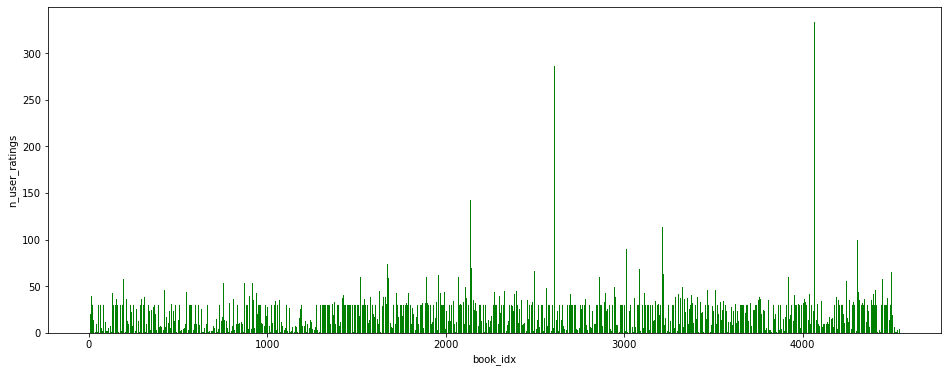

In [67]:
# Plot the number of user ratings recorded for each book.

x_books = list(merged_size.index)
y_n_ratings = list(merged_size)

plt.figure(figsize=(16, 6))
plt.bar(range(len(x_books)), y_n_ratings, color = 'g')
plt.xlabel('book_idx')
plt.ylabel('n_user_ratings');

In [68]:
# The most rated book in the Merged DF.

max_rated_idx = np.argmax(y_n_ratings)
x_books[max_rated_idx], y_n_ratings[max_rated_idx]

(('শ্রেষ্ঠ গল্প', 'Bibhutibhushan Bandyopadhyay'), 333)

In [69]:
# The k most rated books in the Merged DF.

k = 10
top_k_idx = np.argpartition(y_n_ratings, -k)[-k:]
top_k = {x_books[i]: y_n_ratings[i] for i in top_k_idx}
top_k

{('শ্রেষ্ঠ গল্প', 'Nabarun Bhattacharya'): 333,
 ('শ্রেষ্ঠ গল্প', 'Manik Bandopadhyay'): 333,
 ('শ্রেষ্ঠ গল্প', 'Kazi Nazrul Islam'): 333,
 ('শ্রেষ্ঠ গল্প', 'তারাশঙ্কর বন্দোপাধ্যায়'): 333,
 ('শ্রেষ্ঠ গল্প', 'Sunil Gangopadhyay'): 333,
 ('শ্রেষ্ঠ গল্প', 'Buddhadeb Guha'): 333,
 ('শ্রেষ্ঠ গল্প', 'Bibhutibhushan Bandyopadhyay'): 333,
 ('শ্রেষ্ঠ গল্প', 'Syed Mustafa Siraj'): 333,
 ('শ্রেষ্ঠ গল্প', 'Syed Mujtaba Ali'): 333,
 ('শ্রেষ্ঠ গল্প', 'Mahasweta Devi'): 333}

In [70]:
# Therefore, the most read authors in this dataset -

for item in sorted(top_k.items(), key = lambda i: i[1], reverse = True):
    print(item[0][1])

Nabarun Bhattacharya
Manik Bandopadhyay
Kazi Nazrul Islam
তারাশঙ্কর বন্দোপাধ্যায়
Sunil Gangopadhyay
Buddhadeb Guha
Bibhutibhushan Bandyopadhyay
Syed Mustafa Siraj
Syed Mujtaba Ali
Mahasweta Devi


# References & Acknowledgements:

1. https://groups.google.com/g/pydata/c/CR4ysZiX-oQ
2. https://stackoverflow.com/questions/48647534/python-pandas-find-difference-between-two-data-frames
3. https://stackoverflow.com/questions/11348347/find-non-common-elements-in-lists
4. https://blog.finxter.com/python-__contains__-magic-method/
5. https://stackoverflow.com/questions/69612334/check-if-a-string-only-contains-specific-characters
6. https://stackoverflow.com/questions/17957890/pandas-select-from-dataframe-using-startswith
7. https://stackoverflow.com/questions/28256761/select-pandas-rows-by-excluding-index-number
8. https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
9. https://stackoverflow.com/questions/35268817/unique-combinations-of-values-in-selected-columns-in-pandas-data-frame-and-count
10. https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
11. https://stackoverflow.com/questions/62503672/quickest-way-to-find-partial-string-match-between-two-pandas-dataframes
12. https://stackoverflow.com/questions/54756025/how-to-merge-pandas-on-string-contains
13. https://stackoverflow.com/questions/45299305/how-to-plot-pandas-groupby-values-in-a-graph
14. https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array/23734295#23734295
15. https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value